In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch import nn
import numpy as np


from unityagents import UnityEnvironment
from src.model.ppo import PPOAgent, PPOTrainer

In [2]:
# env = UnityEnvironment(file_name='unity/Reacher.app', no_graphics=True)
env = UnityEnvironment(file_name='unity/Reacher20.app', no_graphics=False)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
agent = PPOAgent(env, 
                 network_config={
                     'actor_hidden_sizes': [256, 128],
                     'critic_hidden_sizes': [256, 128],
                     'hidden_activation': nn.ReLU,
                     'output_activation': nn.Tanh}, seed=4)

agent.policy.pi, agent.policy.V

(Actor(
   (layers): ModuleList(
     (0): Linear(in_features=33, out_features=256, bias=True)
     (1): ReLU()
     (2): Linear(in_features=256, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=4, bias=True)
     (5): Tanh()
   )
 ),
 Critic(
   (layers): ModuleList(
     (0): Linear(in_features=33, out_features=256, bias=True)
     (1): ReLU()
     (2): Linear(in_features=256, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=1, bias=True)
   )
 ))

Episode 175: Exploration std mean: 0.31, Score: 39.27, 100 episode Mean Score: 37.75:  58%|█████▊    | 175/300 [18:10<12:46,  6.13s/episodes]INFO:model.ppo.trainer:	Training Complete at episode 176
Episode 175: Exploration std mean: 0.31, Score: 39.27, 100 episode Mean Score: 37.75:  58%|█████▊    | 175/300 [18:16<13:03,  6.27s/episodes]


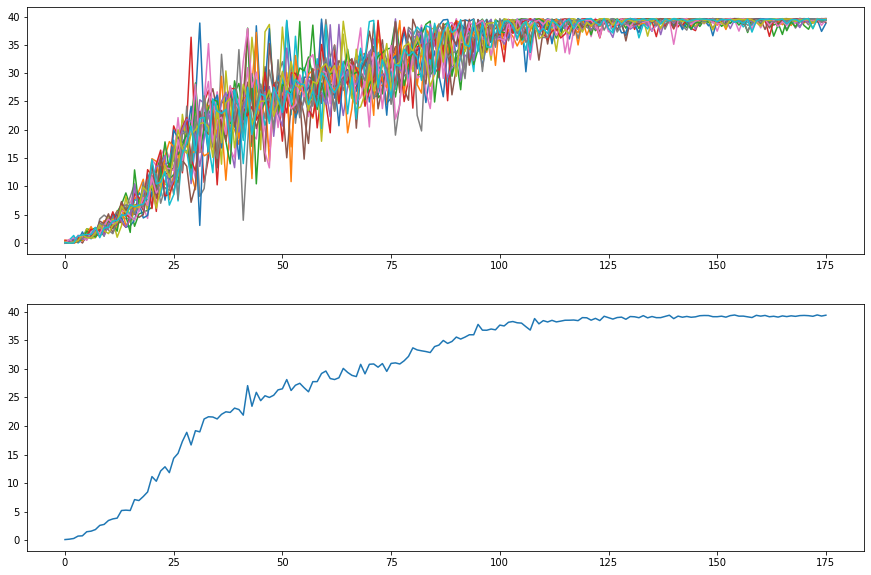

In [4]:
trainer = PPOTrainer(agent, 
                     batch_size=512, 
                     learning_rate_actor=1e-4, learning_rate_critic=1e-4,
                     gamma=0.99, epsilon_clip=0.2, 
                     training_epochs=10, gae_lambda=.9, beta=1e-3,
                     filename='PPO.pth',
                     filepath='assets/ppo/'
                     )
new_agent = trainer.train(n_episodes=300, max_steps_per_episode=1000, target=38.)

fig, ax = plt.subplots(figsize=(15, 5 * (1 + int(agent.n_threads > 1))), nrows=1 + int(agent.n_threads > 1))
if agent.n_threads > 1:
    ax[0].plot(trainer.scores)
    ax[1].plot(np.asarray(trainer.scores).mean(axis=1))
else:
    ax.plot(trainer.scores)

plt.show()

In [5]:
new_agent.run_test_episode(track_progress=True, noisy=False)

Mean Cumulative Reward: 39.41: 100%|██████████| 1000/1000 [00:41<00:00, 24.03it/s]


array([39.41999912, 39.57999912, 39.52999912, 39.57999912, 39.58999912,
       39.59999911, 39.41999912, 39.35999912, 39.40999912, 39.27999912,
       39.53999912, 39.43999912, 39.41999912, 37.89999915, 39.48999912,
       39.61999911, 39.40999912, 39.58999912, 39.43999912, 39.50999912])